# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv',nrows=50000)
resource_data = pd.read_csv('resources.csv')

In [3]:
project_data.shape

(50000, 17)

In [4]:
project_data['project_is_approved'].value_counts()

1    42286
0     7714
Name: project_is_approved, dtype: int64

In [5]:
resource_data.shape

(1541272, 4)

In [6]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [7]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   

      project_subject_categories project_subject_subcategories  \
473             Applied Learning             Early Development   
41558        Literacy & Language                      Literacy   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  
473                                               2                    1  
41558                                             2                    1

In [8]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [9]:
print(project_data['project_subject_categories'].head(5))

473                      Applied Learning
41558                 Literacy & Language
29891    Math & Science, History & Civics
23374                 Literacy & Language
49228                 Literacy & Language
Name: project_subject_categories, dtype: object


In [10]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


In [11]:
print(project_data['clean_categories'].head(5))

473                  AppliedLearning
41558              Literacy_Language
29891    Math_Science History_Civics
23374              Literacy_Language
49228              Literacy_Language
Name: clean_categories, dtype: object


## 1.3 preprocessing of `project_subject_subcategories`

In [12]:
print(project_data['project_subject_subcategories'].head(5))

473                 Early Development
41558                        Literacy
29891    Mathematics, Social Sciences
23374                   ESL, Literacy
49228                        Literacy
Name: project_subject_subcategories, dtype: object


In [13]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [14]:
print(project_data['clean_subcategories'].head(5))

473                EarlyDevelopment
41558                      Literacy
29891    Mathematics SocialSciences
23374                  ESL Literacy
49228                      Literacy
Name: clean_subcategories, dtype: object


## 1.4 preprocessing of `school_state`

In [15]:
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())

state_dict = dict(my_counter)
sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))

In [16]:
print(project_data['school_state'].head(5))

473      GA
41558    WA
29891    CA
23374    CA
49228    IL
Name: school_state, dtype: object


## 1.5 preprocessing of `project_grade_category`

In [17]:
preproc = []
# tqdm is for printing the status bar
for sent in project_data['project_grade_category']:
    sent = sent.replace('Grades ', '')
    sent = sent.replace('PreK-2', 'PreKto2')
    sent = sent.replace('3-5', '3to5')
    sent = sent.replace('6-8', '6to8')
    sent = sent.replace('9-12', '9to12')
    preproc.append(sent)
project_data['project_grade_category']=preproc

In [18]:
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split())

grade_dict = dict(my_counter)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))

In [19]:
print(project_data['project_grade_category'].head(5))

473      PreKto2
41558       3to5
29891       3to5
23374    PreKto2
49228    PreKto2
Name: project_grade_category, dtype: object


## 1.6 preprocessing of `teacher_prefix`

In [20]:
print(type(project_data['teacher_prefix']))

<class 'pandas.core.series.Series'>


In [21]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].astype(str)
preproc = []
# tqdm is for printing the status bar
for sent in project_data['teacher_prefix']:
    sent = sent.replace('Mr.', 'Mr')
    sent = sent.replace('Mrs.', 'Mrs')
    sent = sent.replace('Dr.', 'Dr')
    sent = sent.replace('Ms.', 'Ms')
    sent = sent.replace('nan','')
    preproc.append(sent)
project_data['teacher_prefix']=preproc

In [22]:
#['Teacher', 'Mrs.', 'Dr.', 'Mr.', 'Ms.']
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('')
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(word.split())

teacher_dict = dict(my_counter)
sorted_teacher_dict = dict(sorted(teacher_dict.items(), key=lambda kv: kv[1]))

In [23]:
print(project_data['teacher_prefix'].head(5))

473      Mrs
41558    Mrs
29891    Mrs
23374     Ms
49228     Ms
Name: teacher_prefix, dtype: object


## 1.3 Preprocessing of Essays

In [24]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [25]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [26]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [27]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:31<00:00, 1562.98it/s]


In [28]:
# after preprocesing
preprocessed_essays[2000]

'teach elementary school 4th 5th grade building small town central illinois next year teaching three different classes students reading language writing spelling classroom students enjoy variety activities including hands collaborative learning order help make information real interesting giving reason practice students wide variety students school 60 students receiving free lunch low income percentage students often require additional help support help make learning valuable real world teachers work hard collaborate order help students achieve highest level community supportive schools lately lower levels state support many local businesses cut back individual assistance classrooms order continue learning projects look support help us next year focusing great deal ela english language arts time 5th grade improving writing across curriculum math science reading language social studies individual marker boards give students ability practice writing skills individually giving ability che

In [29]:
project_data['essay']=preprocessed_essays

<h2> 1.4 Preprocessing of `project_title`</h2>

In [30]:
# similarly you can preprocess the titles also
preprocessed_titles = []
# tqdm is for printing the status bar
for sentence in tqdm(project_data['project_title'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:01<00:00, 35161.72it/s]


In [31]:
project_data['project_title']=preprocessed_titles

## 1.5 Preparing data for models

In [32]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

   - school_state : categorical data
   - clean_categories : categorical data
   - clean_subcategories : categorical data
   - project_grade_category : categorical data
   - teacher_prefix : categorical data
   
   
   
   
   
   - project_title : text data
   - text : text data
   - project_resource_summary: text data (optinal)
   
   
   
   
   
   
   - quantity : numerical (optinal)
   - teacher_number_of_previously_posted_projects : numerical
   - price : numerical

In [33]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f,encoding = "ISO-8859-1")
    glove_words =  set(model.keys())

# Assignment 7: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [34]:
y = project_data['project_is_approved']
print(y.shape)

(50000,)


In [35]:
project_data.drop(['project_is_approved'],axis=1,inplace=True)

In [36]:
X=project_data
print(X.shape)

(50000, 17)


In [37]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [38]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("="*100)

(33500, 17) (33500,)
(16500, 17) (16500,)


In [39]:
X_test_preserved=X_test
y_test_preserved=y_test

<h2>2.3 Make Data Model Ready: encoding numerical and categorical features</h2>

### Vectorizing Numerical features

In [40]:
features=[]

In [41]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

In [42]:
price_data.head(5)

id    price  quantity
0  p000001   459.56         7
1  p000002   515.89        21
2  p000003   298.97         4
3  p000004  1113.69        98
4  p000005   485.99         8

In [43]:
X_train=pd.merge(X_train,price_data,on='id',how='left')
X_test=pd.merge(X_test,price_data,on='id',how='left')

In [44]:
X_train=X_train.fillna(0)
X_test=X_test.fillna(0)

<h4>Normalizing the numerical features: Price</h4>

In [45]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))
X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))
features += ['price']
print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


<h4>Normalizing the numerical features: Number of previously posted projects </h4>

In [46]:
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_train_project_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_project_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
features += ['teacher_number_of_previously_posted_projects']
print("After vectorizations")
print(X_train_project_norm.shape, y_train.shape)
print(X_test_project_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


### Vectorizing Categorical features

- school_state : categorical data
- clean_categories : categorical data
- clean_subcategories : categorical data
- project_grade_category : categorical data
- teacher_prefix : categorical data

<h4>Vectorizing Categorical features: project grade category </h4>

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
vectorizer = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)
features += vectorizer.get_feature_names()
print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 4) (33500,)
(16500, 4) (16500,)
['PreKto2', '3to5', '9to12', '6to8']


<h4>Vectorizing Categorical features: teacher prefix </h4>

In [49]:
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)
features += vectorizer.get_feature_names()
print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 5) (33500,)
(16500, 5) (16500,)
['Dr', 'Ms', 'Mrs', 'Mr', 'Teacher']


In [50]:
type(vectorizer.get_feature_names())

list

<h4>Vectorizing Categorical features: school state </h4>

In [51]:
vectorizer = CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)
features += vectorizer.get_feature_names()
print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 51) (33500,)
(16500, 51) (16500,)
['LA', 'FL', 'DE', 'SD', 'WI', 'ID', 'NE', 'WY', 'ND', 'MA', 'CT', 'IN', 'MT', 'GA', 'VA', 'KS', 'SC', 'PA', 'MI', 'UT', 'KY', 'VT', 'OR', 'AK', 'MD', 'WV', 'NH', 'AZ', 'CA', 'AL', 'MS', 'DC', 'NY', 'NC', 'MO', 'NV', 'CO', 'OH', 'RI', 'AR', 'NM', 'ME', 'WA', 'TN', 'IA', 'NJ', 'MN', 'TX', 'HI', 'OK', 'IL']


<h4>Vectorizing Categorical features: clean categories </h4>

In [52]:
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_cat_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_test_cat_ohe = vectorizer.transform(X_test['clean_categories'].values)
features += vectorizer.get_feature_names()
print("After vectorizations")
print(X_train_cat_ohe.shape, y_train.shape)
print(X_test_cat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 9) (33500,)
(16500, 9) (16500,)
['Literacy_Language', 'Music_Arts', 'Math_Science', 'AppliedLearning', 'Care_Hunger', 'Health_Sports', 'History_Civics', 'SpecialNeeds', 'Warmth']


<h4>Vectorizing Categorical features: clean subcategories </h4>

In [53]:
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_sub_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_sub_ohe = vectorizer.transform(X_test['clean_subcategories'].values)
features += vectorizer.get_feature_names()
print("After vectorizations")
print(X_train_sub_ohe.shape, y_train.shape)
print(X_test_sub_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100);

After vectorizations
(33500, 30) (33500,)
(16500, 30) (16500,)
['Literacy', 'Warmth', 'ParentInvolvement', 'ForeignLanguages', 'NutritionEducation', 'History_Geography', 'Music', 'Care_Hunger', 'College_CareerPrep', 'TeamSports', 'CharacterEducation', 'EarlyDevelopment', 'FinancialLiteracy', 'Health_Wellness', 'Civics_Government', 'VisualArts', 'ESL', 'Economics', 'PerformingArts', 'AppliedSciences', 'Gym_Fitness', 'Extracurricular', 'Health_LifeScience', 'Mathematics', 'EnvironmentalScience', 'Literature_Writing', 'CommunityService', 'SpecialNeeds', 'Other', 'SocialSciences']


<h2>2.2 Make Data Model Ready: encoding eassay, and project_title</h2>

In [54]:
features_bow = features
features_tfidf = features

<h3>Encoding of Text Data</h3>

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

<h4>BOW of Essay</h4>

In [56]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

In [57]:
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 4), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [58]:
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)

In [59]:
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

In [60]:
features_bow += vectorizer.get_feature_names()
print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 5000) (33500,)
(16500, 5000) (16500,)


<h4>BOW of Title</h4>

In [61]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

In [62]:
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 4), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [63]:
# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train['project_title'].values)

In [64]:
X_test_title_bow = vectorizer.transform(X_test['project_title'].values)

In [65]:
features_bow += vectorizer.get_feature_names()
print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_test_title_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 2904) (33500,)
(16500, 2904) (16500,)


<h4>TFIDF of Essay</h4>

In [66]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

In [67]:
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [68]:
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)

In [69]:
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

In [70]:
features_tfidf += vectorizer.get_feature_names()
print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 5000) (33500,)
(16500, 5000) (16500,)


<h4>TFIDF of Title</h4>

In [71]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

In [72]:
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [73]:
# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer.transform(X_train['project_title'].values)

In [74]:
X_test_title_tfidf = vectorizer.transform(X_test['project_title'].values)

In [75]:
features_tfidf += vectorizer.get_feature_names()
print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 2904) (33500,)
(16500, 2904) (16500,)


<h4>Avg W2V of Essay</h4>

In [76]:
# average Word2Vec
# compute average word2vec for each essay.
avg_w2v_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay_train.append(vector)
print(len(avg_w2v_essay_train))
print(len(avg_w2v_essay_train[0]))
print(type(avg_w2v_essay_train))

100%|██████████| 33500/33500 [00:11<00:00, 3029.54it/s]

33500
300
<class 'list'>


In [77]:
# average Word2Vec
# compute average word2vec for each essay.
avg_w2v_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay_test.append(vector)
print(len(avg_w2v_essay_test))
print(len(avg_w2v_essay_test[0]))
print(type(avg_w2v_essay_test))

100%|██████████| 16500/16500 [00:05<00:00, 3030.78it/s]

16500
300
<class 'list'>


<h4>Avg W2V of Title</h4>

In [78]:
# average Word2Vec
# compute average word2vec for each essay.
avg_w2v_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_train.append(vector)

print(len(avg_w2v_title_train))
print(len(avg_w2v_title_train[0]))
print(type(avg_w2v_title_train))

100%|██████████| 33500/33500 [00:00<00:00, 53527.74it/s]

33500
300
<class 'list'>


In [79]:
# average Word2Vec
# compute average word2vec for each essay.
avg_w2v_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_test.append(vector)

print(len(avg_w2v_title_test))
print(len(avg_w2v_title_test[0]))
print(type(avg_w2v_title_test))

100%|██████████| 16500/16500 [00:00<00:00, 57449.88it/s]

16500
300
<class 'list'>


<h4>TFIDF-W2V of Essay</h4>

In [80]:
tfidf_model = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
tfidf_model.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [81]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_train_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_train_essay.append(vector)

print(len(tfidf_w2v_train_essay))
print(len(tfidf_w2v_train_essay[0]))

100%|██████████| 33500/33500 [00:53<00:00, 621.26it/s]

33500
300


In [82]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_test_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_test_essay.append(vector)

print(len(tfidf_w2v_test_essay))
print(len(tfidf_w2v_test_essay[0]))

100%|██████████| 16500/16500 [00:26<00:00, 626.09it/s]

16500
300


<h4>TFIDF-W2V of Title</h4>

In [83]:
tfidf_model = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
tfidf_model.fit(X_train['project_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [84]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_train_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_train_title.append(vector)

print(len(tfidf_w2v_train_title))
print(len(tfidf_w2v_train_title[0]))

100%|██████████| 33500/33500 [00:01<00:00, 31910.27it/s]

33500
300


In [85]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_test_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_test_title.append(vector)

print(len(tfidf_w2v_test_title))
print(len(tfidf_w2v_test_title[0]))

100%|██████████| 16500/16500 [00:00<00:00, 31259.92it/s]

16500
300


# Applying DT on BOW,<font color='red'> SET 1</font>

### Creating Data Matrix

In [86]:
# Please write all the code with proper documentation

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow,X_train_title_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_cat_ohe,X_train_sub_ohe, X_train_price_norm,X_train_project_norm)).tocsr()
X_te = hstack((X_test_essay_bow,X_test_title_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_cat_ohe,X_test_sub_ohe, X_test_price_norm,X_test_project_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 8028) (33500,)
(16500, 8028) (16500,)


<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [87]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

parameters = {'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100,500]}

classifier = GridSearchCV(tree, parameters, cv=3, scoring='roc_auc')
select = classifier.fit(X_tr, y_train)

CPU times: user 15min 2s, sys: 1.74 s, total: 15min 4s
Wall time: 15min 4s


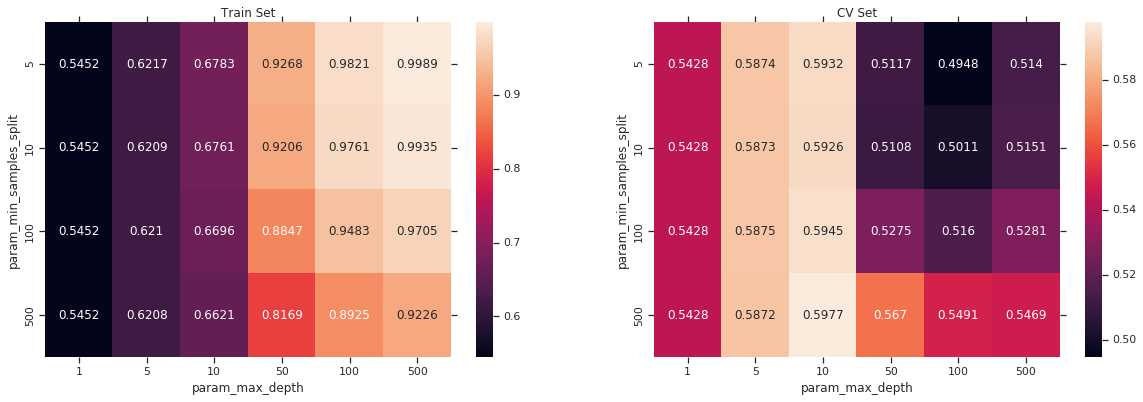

In [88]:
import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(classifier.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

<h4>Train The Model</h4>

In [89]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [90]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc


classifier = DecisionTreeClassifier(max_depth = 15, min_samples_split = 2000)

classifier.fit(X_tr, y_train)
#clfV1.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(classifier, X_tr)    
y_test_pred = batch_predict(classifier, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

<h4>Confusion Matrix</h4>

In [91]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    global predictions1
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1=predictions
    return predictions

In [92]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24983690416854376 for threshold 0.837


In [93]:
#conf_matr_df_train_2[1][0]
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,test_fpr,test_fpr)),range(2),range(2))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24872248506506206 for threshold 0.847


In [94]:
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

In [95]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [96]:
classifier = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2000)
classifier.fit(X_tr, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2000, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [97]:

dot_data = StringIO()

#dt_feat_names = list(X_test.columns)
#dt_target_names = [str(s) for s in [0,1]]
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features_bow)
                
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [98]:
k=y_test.index
k=list(k)

In [99]:
fpi = []
for i in range(len(y_test)):
    if(y_test[k[i]] == 0) and (predictions1[i] == 1) :
        fpi.append(k[i])

In [100]:
fp_essay = []
for i in fpi :
    fp_essay.append(X_test_preserved['essay'][i])

In [101]:
len(fp_essay)

1182

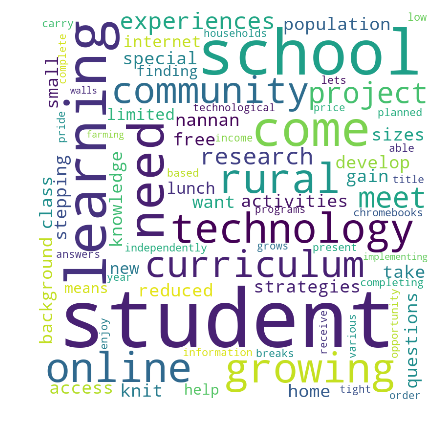

In [102]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay :
    val = str(val)
    tokens = val.split()
    
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

for words in tokens :
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [103]:
X_test.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      169663  p207191  16464c60f32ac7d9c73909a9c49192a6             Mr   

  school_state                Date project_grade_category  \
0           AZ 2016-11-29 14:21:59                   6to8   

                    project_title  \
0  yoga supplies student wellness   

                                     project_essay_1  \
0  My students are caring, curious, and courageou...   

                                     project_essay_2 project_essay_3  \
0  My students need a yoga mat and block to find ...               0   

  project_essay_4                           project_resource_summary  \
0               0  My students need mats and blocks to be able to...   

   teacher_number_of_previously_posted_projects clean_categories  \
0                                             0    Health_Sports   

  clean_subcategories                                              essay  \
0     Health_Wellness  students caring curious courageous young men w...   

   price  quantity  
0  31.98        48

In [104]:
X_test_preserved.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
37022      169663  p207191  16464c60f32ac7d9c73909a9c49192a6             Mr   
48564      128148  p248545  dd6a96855e9152086ce845d160d35362             Ms   

      school_state                Date project_grade_category  \
37022           AZ 2016-11-29 14:21:59                   6to8   
48564           TX 2016-06-29 16:10:19                PreKto2   

                        project_title  \
37022  yoga supplies student wellness   
48564     vocabulary development ppcd   

                                         project_essay_1  \
37022  My students are caring, curious, and courageou...   
48564  \"The child begins to perceive the world not o...   

                                         project_essay_2 project_essay_3  \
37022  My students need a yoga mat and block to find ...             NaN   
48564  A meaningful vocabulary is one of the most imp...             NaN   

      project_essay_4                           project_resource_summary  \
37022             NaN  My students need mats and blocks to be able to...   
48564             NaN  My students need high-quality vocabulary cards...   

       teacher_number_of_previously_posted_projects  \
37022                                             0   
48564                                            32   

                   clean_categories            clean_subcategories  \
37022                 Health_Sports                Health_Wellness   
48564  AppliedLearning SpecialNeeds  EarlyDevelopment SpecialNeeds   

                                                   essay  
37022  students caring curious courageous young men w...  
48564  child begins perceive world not eyes also spee...

In [105]:
X_test.filter(items=[0], axis=0)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      169663  p207191  16464c60f32ac7d9c73909a9c49192a6             Mr   

  school_state                Date project_grade_category  \
0           AZ 2016-11-29 14:21:59                   6to8   

                    project_title  \
0  yoga supplies student wellness   

                                     project_essay_1  \
0  My students are caring, curious, and courageou...   

                                     project_essay_2 project_essay_3  \
0  My students need a yoga mat and block to find ...               0   

  project_essay_4                           project_resource_summary  \
0               0  My students need mats and blocks to be able to...   

   teacher_number_of_previously_posted_projects clean_categories  \
0                                             0    Health_Sports   

  clean_subcategories                                              essay  \
0     Health_Wellness  students caring curious courageous young men w...   

   price  quantity  
0  31.98        48

In [106]:
cols = X_test.columns
X_test_fp = pd.DataFrame(columns=cols)

In [107]:
for i in fpi :
    for j in range(16500):
        if X_test_preserved.index[j]==i:
            X_test_fp = X_test_fp.append(X_test.filter(items=[j], axis=0))

In [108]:
X_test_fp.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
8      57671.0  p044369  2fe609e32950ce7a12baa55a9720b2fa            Mrs   
26     48114.0  p043313  cfd4140a5b486ed2d983cabb3dafe861             Ms   

   school_state                Date project_grade_category  \
8            MI 2016-06-29 02:44:52                PreKto2   
26           RI 2016-09-14 08:50:16                   3to5   

                                     project_title  \
8   smiling second grade building word connections   
26                                  calming corner   

                                      project_essay_1  \
8   I work for a Title I school with students from...   
26  As the school psychologist, I have a select gr...   

                                      project_essay_2 project_essay_3  \
8   It is essential that students learn the fundam...               0   
26  These materials would allow me to provide a sa...               0   

   project_essay_4                           project_resource_summary  \
8                0  My students need a Word Work presentation cart...   
26               0  My students need a safe place in the school wh...   

    teacher_number_of_previously_posted_projects   clean_categories  \
8                                           10.0  Literacy_Language   
26                                           1.0       SpecialNeeds   

   clean_subcategories                                              essay  \
8         ESL Literacy  work title school students diverse backgrounds...   
26        SpecialNeeds  school psychologist select group students meet...   

     price  quantity  
8   141.52      53.0  
26  174.97       3.0

In [109]:
len(X_test_fp)

1182

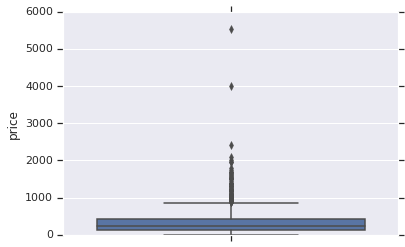

In [110]:
sns.boxplot(y='price', data=X_test_fp)

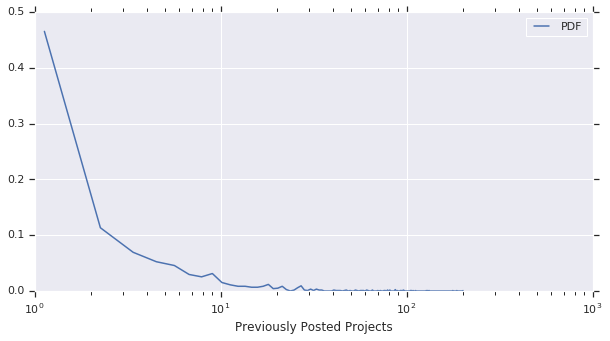

In [111]:
plt.figure(figsize=(10,5))

counts, bin_edges = np.histogram(X_test_fp['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
plt.legend([pdfP], ["PDF"]) 
plt.xscale('log')
plt.xlabel('Previously Posted Projects')    
plt.show()

# Applying DT on TFIDF,<font color='red'> SET 2</font>

### Creating Data Matrix

In [112]:
# Please write all the code with proper documentation


# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf,X_train_title_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_cat_ohe,X_train_sub_ohe, X_train_price_norm,X_train_project_norm)).tocsr()
X_te = hstack((X_test_essay_tfidf,X_test_title_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_cat_ohe,X_test_sub_ohe, X_test_price_norm,X_test_project_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 8028) (33500,)
(16500, 8028) (16500,)


<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [113]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

parameters = {'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100,500]}

classifier = GridSearchCV(tree, parameters, cv=3, scoring='roc_auc')
select = classifier.fit(X_tr, y_train)

CPU times: user 27min 1s, sys: 49.7 ms, total: 27min 1s
Wall time: 27min 1s


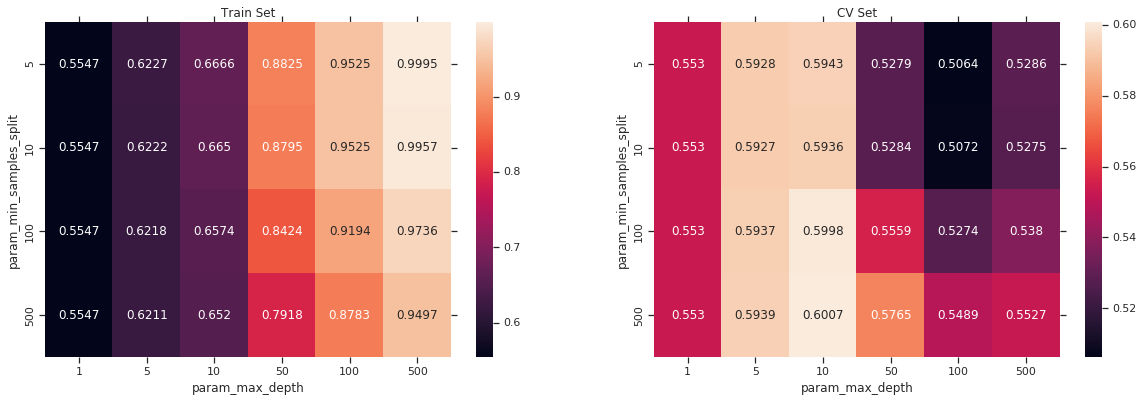

In [114]:
import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(classifier.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

<h4>Train The Model</h4>

In [115]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

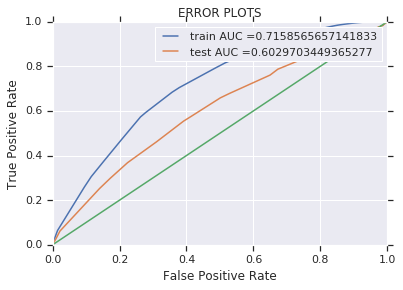

In [116]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc


classifier = DecisionTreeClassifier(max_depth = 50, min_samples_split = 3000)

classifier.fit(X_tr, y_train)
#clfV1.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(classifier, X_tr)    
y_test_pred = batch_predict(classifier, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

<h4>Confusion Matrix</h4>

In [117]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    global predictions1
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1=predictions
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24977800845162898 for threshold 0.813


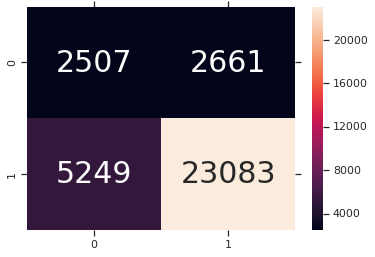

In [118]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

In [119]:
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2499986115644953 for threshold 0.863


In [120]:
classifier = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2000)
classifier.fit(X_tr, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2000, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

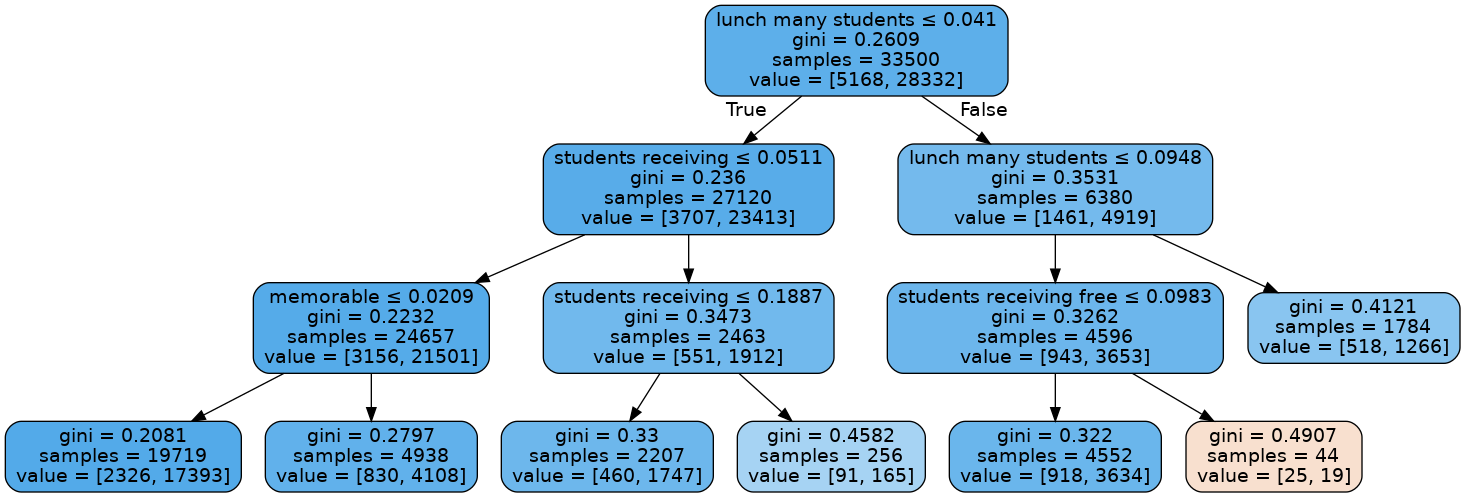

In [121]:
dot_data = StringIO()

export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features_tfidf)
                
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [122]:
fpi = []
for i in range(len(y_test)):
    if(y_test[k[i]] == 0) and (predictions1[i] == 1) :
        fpi.append(k[i])

In [123]:
fp_essay = []
for i in fpi :
    fp_essay.append(X_test_preserved['essay'][i])

In [124]:
len(fp_essay)

1276

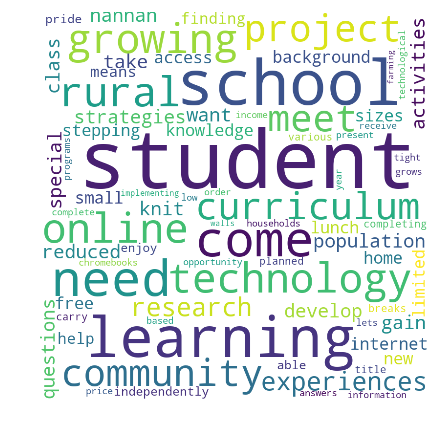

In [125]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay :
    val = str(val)
    tokens = val.split()
    
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

for words in tokens :
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [126]:
cols = X_test.columns
X_test_fp = pd.DataFrame(columns=cols)

In [127]:
for i in fpi :
    for j in range(16500):
        if X_test_preserved.index[j]==i:
            X_test_fp = X_test_fp.append(X_test.filter(items=[j], axis=0))

In [128]:
len(X_test_fp)

1276

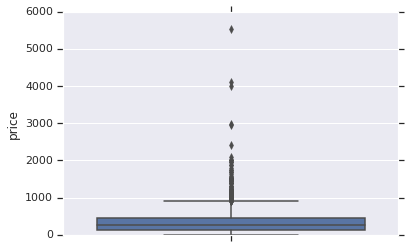

In [129]:
sns.boxplot(y='price', data=X_test_fp)

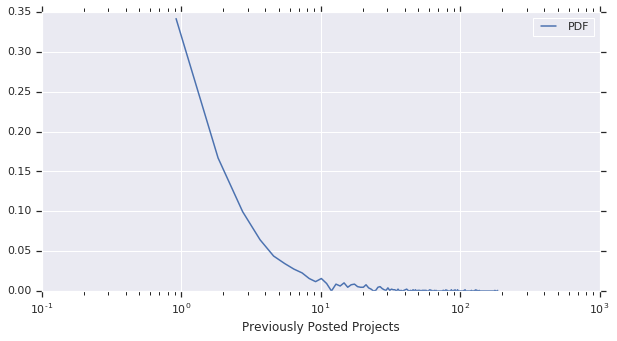

In [130]:
plt.figure(figsize=(10,5))

counts, bin_edges = np.histogram(X_test_fp['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
plt.legend([pdfP], ["PDF"]) 
plt.xscale('log')
plt.xlabel('Previously Posted Projects')    
plt.show()

# Applying DT on AVG W2V,<font color='red'> SET 3</font>

### Creating Data Matrix

In [131]:
# Please write all the code with proper documentation

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((avg_w2v_essay_train,avg_w2v_title_train, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_cat_ohe,X_train_sub_ohe, X_train_price_norm,X_train_project_norm)).tocsr()
X_te = hstack((avg_w2v_essay_test,avg_w2v_title_test, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_cat_ohe,X_test_sub_ohe, X_test_price_norm,X_test_project_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 701) (33500,)
(16500, 701) (16500,)


<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [132]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

parameters = {'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100,500]}

classifier = GridSearchCV(tree, parameters, cv=3, scoring='roc_auc')
select = classifier.fit(X_tr, y_train)

CPU times: user 1h 11min 44s, sys: 26.4 s, total: 1h 12min 11s
Wall time: 1h 12min 11s


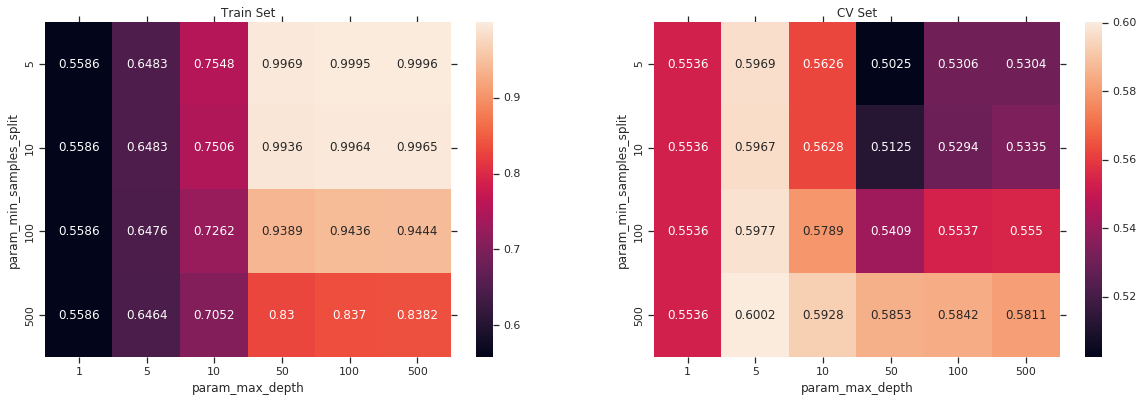

In [135]:
import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(classifier.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

<h4>Train The Model</h4>

In [136]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

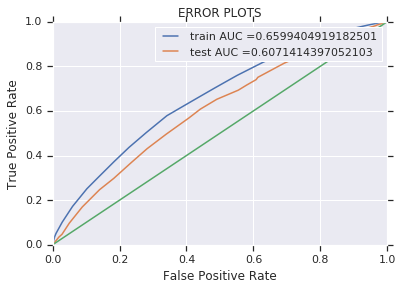

In [137]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc


classifier = DecisionTreeClassifier(max_depth = 30, min_samples_split = 2500)

classifier.fit(X_tr, y_train)
#clfV1.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(classifier, X_tr)    
y_test_pred = batch_predict(classifier, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

<h4>Confusion Matrix</h4>

In [138]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    global predictions1
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1=predictions
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24984663899778584 for threshold 0.823


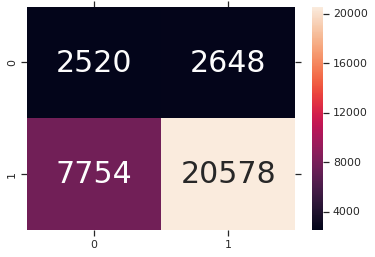

In [139]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24991114012769905 for threshold 0.827


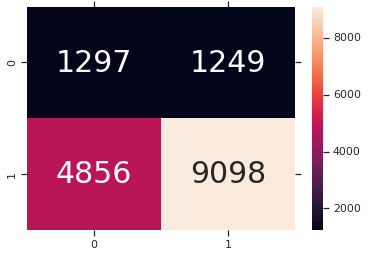

In [140]:
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

In [141]:
fpi = []
for i in range(len(y_test)):
    if(y_test[k[i]] == 0) and (predictions1[i] == 1) :
        fpi.append(k[i])

In [142]:
fp_essay = []
for i in fpi :
    fp_essay.append(X_test_preserved['essay'][i])

In [143]:
len(fp_essay)

1249

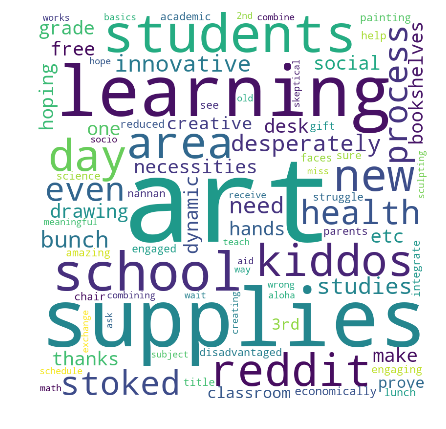

In [144]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay :
    val = str(val)
    tokens = val.split()
    
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

for words in tokens :
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [145]:
cols = X_test.columns
X_test_fp = pd.DataFrame(columns=cols)

In [146]:
for i in fpi :
    for j in range(16500):
        if X_test_preserved.index[j]==i:
            X_test_fp = X_test_fp.append(X_test.filter(items=[j], axis=0))

In [147]:
len(X_test_fp)

1249

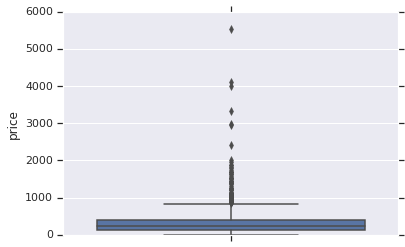

In [148]:
sns.boxplot(y='price', data=X_test_fp)

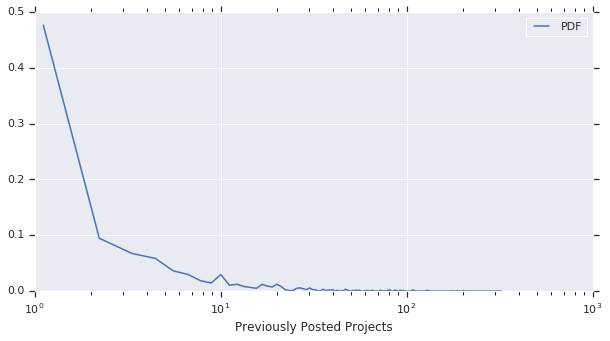

In [149]:
plt.figure(figsize=(10,5))

counts, bin_edges = np.histogram(X_test_fp['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
plt.legend([pdfP], ["PDF"]) 
plt.xscale('log')
plt.xlabel('Previously Posted Projects')    
plt.show()

# Applying DT on TFIDF W2V,<font color='red'> SET 4</font>

### Creating Data Matrix

In [150]:
# Please write all the code with proper documentation

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((tfidf_w2v_train_essay,tfidf_w2v_train_title, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_cat_ohe,X_train_sub_ohe, X_train_price_norm,X_train_project_norm)).tocsr()
X_te = hstack((tfidf_w2v_test_essay,tfidf_w2v_test_title, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_cat_ohe,X_test_sub_ohe, X_test_price_norm,X_test_project_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 701) (33500,)
(16500, 701) (16500,)


<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [151]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

parameters = {'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100,500]}

classifier = GridSearchCV(tree, parameters, cv=3, scoring='roc_auc')
select = classifier.fit(X_tr, y_train)

CPU times: user 1h 5min 21s, sys: 26.2 s, total: 1h 5min 47s
Wall time: 1h 5min 47s


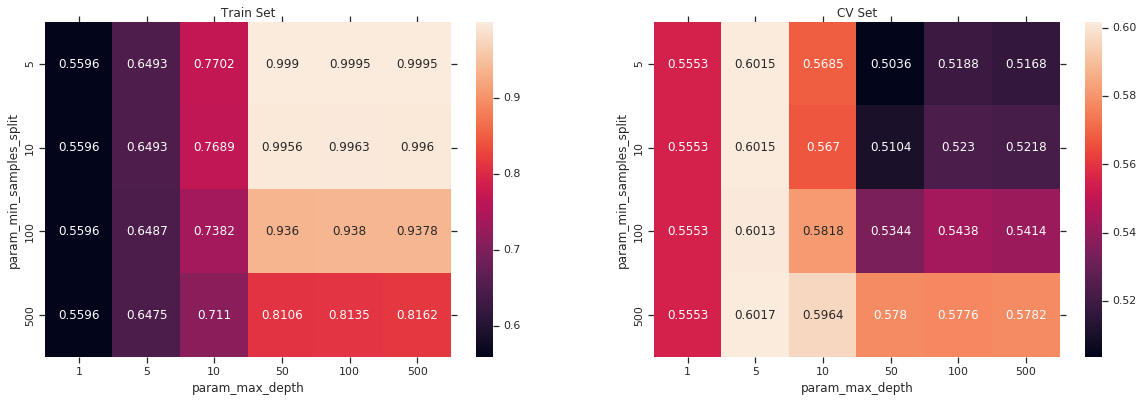

In [152]:
import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(classifier.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

<h4>Train The Model</h4>

In [153]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

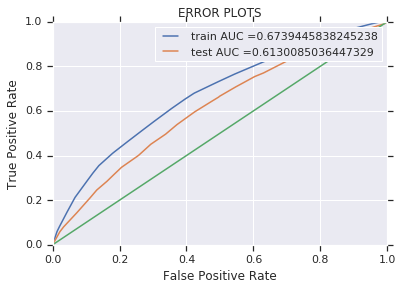

In [154]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc


classifier = DecisionTreeClassifier(max_depth = 50, min_samples_split = 2000)

classifier.fit(X_tr, y_train)
#clfV1.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(classifier, X_tr)    
y_test_pred = batch_predict(classifier, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

<h4>Confusion Matrix</h4>

In [155]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    global predictions1
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1=predictions
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24998786890509828 for threshold 0.796


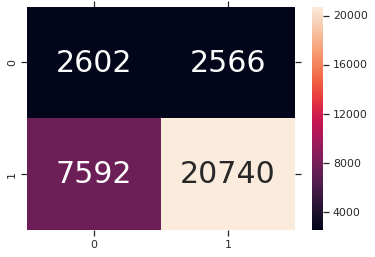

In [156]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999861156449527 for threshold 0.838


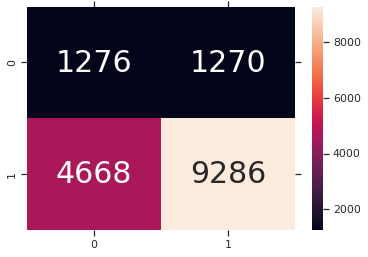

In [157]:
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

In [158]:
fpi = []
for i in range(len(y_test)):
    if(y_test[k[i]] == 0) and (predictions1[i] == 1) :
        fpi.append(k[i])

In [159]:
fp_essay = []
for i in fpi :
    fp_essay.append(X_test_preserved['essay'][i])

In [160]:
len(fp_essay)

1270

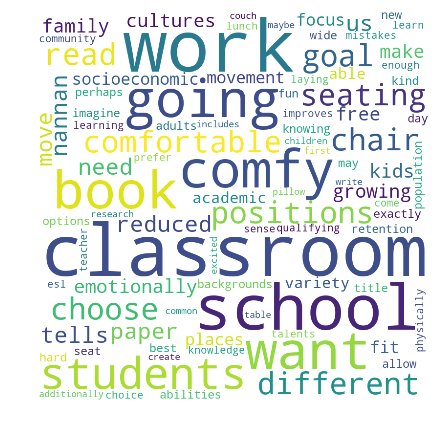

In [161]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay :
    val = str(val)
    tokens = val.split()
    
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

for words in tokens :
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [162]:
cols = X_test.columns
X_test_fp = pd.DataFrame(columns=cols)

In [163]:
for i in fpi :
    for j in range(16500):
        if X_test_preserved.index[j]==i:
            X_test_fp = X_test_fp.append(X_test.filter(items=[j], axis=0))

In [164]:
len(X_test_fp)

1270

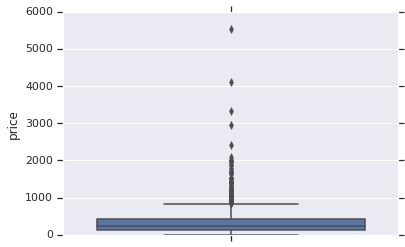

In [165]:
sns.boxplot(y='price', data=X_test_fp)

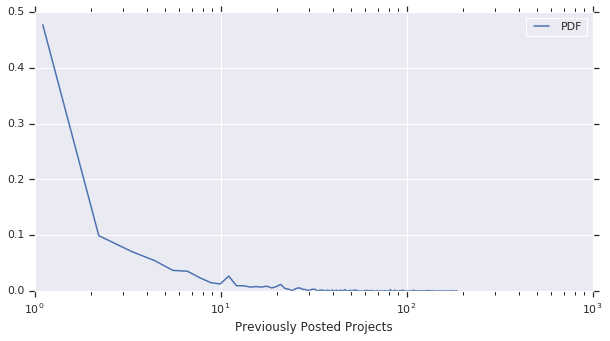

In [166]:
plt.figure(figsize=(10,5))

counts, bin_edges = np.histogram(X_test_fp['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
plt.legend([pdfP], ["PDF"]) 
plt.xscale('log')
plt.xlabel('Previously Posted Projects')    
plt.show()

<h2>Set 5 : SVM on Categorical features, Numerical features & Essay Sentiments</h2>

### Creating Data Matrix and Choosing 5000 best features

In [86]:
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf,X_train_title_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_cat_ohe,X_train_sub_ohe, X_train_price_norm,X_train_project_norm)).tocsr()
X_te = hstack((X_test_essay_tfidf,X_test_title_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_cat_ohe,X_test_sub_ohe, X_test_price_norm,X_test_project_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 8005) (33500,)
(16500, 8005) (16500,)


In [87]:
from sklearn.feature_selection import SelectKBest, chi2

In [88]:
X_new_train = SelectKBest(chi2, k=5000).fit_transform(X_tr, y_train)

In [89]:
X_new_train.shape

(33500, 5000)

In [90]:
X_new_test = SelectKBest(chi2, k=5000).fit_transform(X_te, y_test)

In [91]:
X_new_test.shape

(16500, 5000)

<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [92]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [101]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
log_alphas=[]
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1.0, 1e1, 1e2, 1e3, 1e4]

for i in tqdm(alphas):
    neigh = MultinomialNB(alpha=i)
    neigh.fit(X_tr, y_train)

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_te)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_test, y_cv_pred))
    
for a in tqdm(alphas):
    b = math.log10(a)
    log_alphas.append(b)
print(log_alphas)

100%|██████████| 9/9 [00:00<00:00, 18139.71it/s]

[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


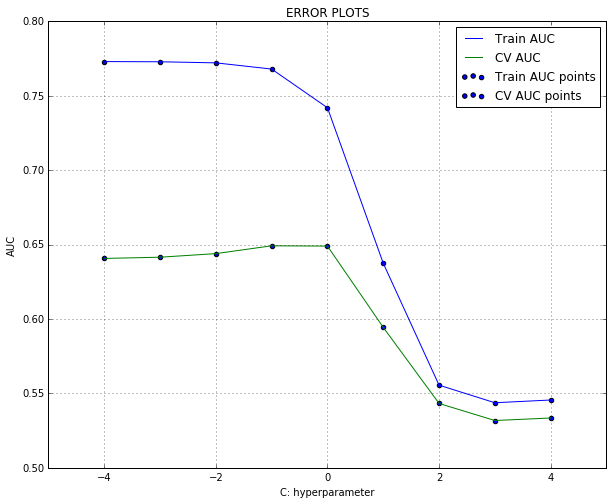

In [103]:
plt.figure(figsize=(10,8))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [104]:
best_alpha=0.1

<h4>Train The Model</h4>

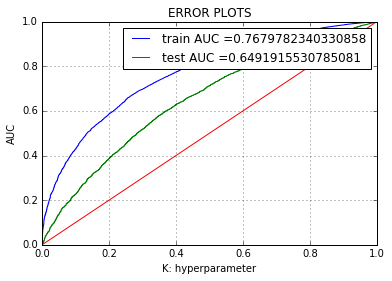

In [105]:
from sklearn.metrics import roc_curve, auc


neigh = MultinomialNB(alpha=best_alpha)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h4>Confusion Matrix</h4>

In [106]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.746


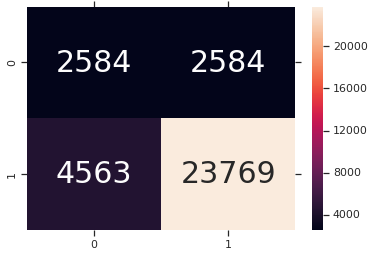

In [107]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.87


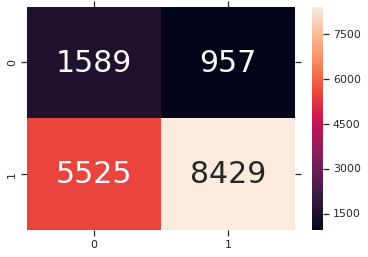

In [108]:
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

<h1>3. Conclusions</h1>

In [110]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x=PrettyTable()
x.field_names=["Vectorizer","Model","AUC"]
x.add_row(["BOW","Decision Tree",0.61])
x.add_row(["TFIDF","Decision Tree",0.60])
x.add_row(["AVG W2V","Decision Tree",0.61])
x.add_row(["TFIDF W2V","Decision Tree",0.61])
x.add_row(["TFIDF","Naive Bayes",0.65])
print(x)

+------------+---------------+------+
| Vectorizer |     Model     | AUC  |
+------------+---------------+------+
|    BOW     | Decision Tree | 0.61 |
|   TFIDF    | Decision Tree | 0.6  |
|  AVG W2V   | Decision Tree | 0.61 |
| TFIDF W2V  | Decision Tree | 0.61 |
|   TFIDF    |  Naive Bayes  | 0.65 |
+------------+---------------+------+
